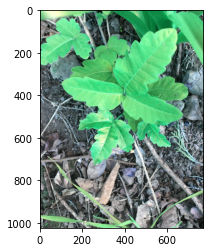

In [74]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "/Users/Shreya/Downloads/plant-detection-data"
CATEGORIES = ["Poison Oak", "Poison Ivy", "Extra"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

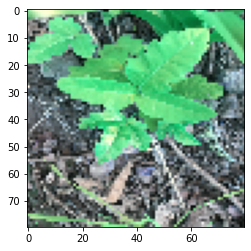

In [75]:
IMG_SIZE = 80

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [76]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [77]:
print(len(training_data))

30


In [78]:
import random

random.shuffle(training_data)

In [79]:
for sample in training_data:
    print(sample[1])

0
1
1
0
2
1
0
0
2
0
0
1
2
1
1
2
0
2
1
0
0
1
1
2
2
2
1
2
0
2


In [80]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)
y = np.array(y).reshape(-1,IMG_SIZE, IMG_SIZE, 1)


ValueError: cannot reshape array of size 30 into shape (80,80,1)

In [81]:
import pickle #saving dataset

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [82]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [83]:
X[1]

array([[[171],
        [102],
        [ 33],
        ...,
        [  3],
        [ 67],
        [ 51]],

       [[ 12],
        [ 33],
        [ 40],
        ...,
        [ 84],
        [  1],
        [150]],

       [[ 70],
        [  5],
        [110],
        ...,
        [177],
        [106],
        [ 50]],

       ...,

       [[ 94],
        [ 25],
        [167],
        ...,
        [206],
        [152],
        [118]],

       [[217],
        [161],
        [ 67],
        ...,
        [  4],
        [ 42],
        [ 37]],

       [[ 19],
        [ 44],
        [ 60],
        ...,
        [121],
        [  8],
        [139]]], dtype=uint8)

In [84]:
#creating our convolutional neural network
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

#normalize data
X = X/225.0

#building model

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", 
              optimizer="adam", 
              metrics=['accuracy'])
model.fit(X, y, batch_size=8, epochs=10, validation_split=0.01)

model.save('PlantCNN.model')


ValueError: `validation_split` is only supported for Tensors or NumPy arrays, found following types in the input: [<class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>]